In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import dataframe_image as dfi
import math

In [2]:
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [3]:
ingresos = pd.read_csv('ingresos_2021.csv', encoding ='Latin1')
ingresos

,ï»¿FOLIO,ANIO,TRIM,FECHA,CONCESIONARIO,K_EMPRESA,EMPRESA,K_GRUPO,GRUPO,I_FIJO_MOVIL,INGRESOS_TOTAL_E
0,100028,2021,4,15DEC2021,ADOLFO MERINO MEDINA,C0089,CABLEMAS,G004,GRUPO TELEVISA,Fijo,434431.000000000
1,100029,2021,4,15DEC2021,AGUSTIN PEREZ VIEYRA,C0009,AGUSTIN PEREZ VIEYRA,C009,AGUSTIN PEREZ VIEYRA,Fijo,682018.800000000
2,100065,2021,4,15DEC2021,ARELY ISABEL GONGORA PECH,C0046,ARELY ISABEL GONGORA PECH,C046,ARELY ISABEL GONGORA PECH,Fijo,1149516.000000000
3,100142,2021,4,15DEC2021,FRANCISCO GUERRA GARCIA,C0666,FRANCISCO GUERRA GARCIA,C666,FRANCISCO GUERRA GARCIA,FIJO,1947843.000000000
4,100147,2021,4,15DEC2021,GABRIEL BUTRON CHIAPA,C0199,GABRIEL BUTRON CHIAPA,C199,GABRIEL BUTRON CHIAPA,Fijo,1109813.000000000
...,...,...,...,...,...,...,...,...,...,...,...
128,519163,2021,4,15DEC2021,"CONVERGENCIA Y DESARROLLO DIGITAL, S.A. DE C.V.",C0807,RED DOG,C807,RED DOG,Fijo y OMV,1460571.890000000
129,519208,2021,4,15DEC2021,"TELMOV MOVIL, S.A. DE C.V.",C0080,TELMOVIL,C080,TELMOVIL,OMV,188109.280000000
130,519363,2021,4,15DEC2021,"MARKETING 358, S.A. DE C.V.",C0473,MARKETING 358,C473,MARKETING 358,OMV,1924097.070000000
131,519422,2021,4,15DEC2021,"BROCOMUNICACIONES MOVILES, S.A.P.I. DE C.V.",C0511,BROMOVIL,C511,BROMOVIL,OMV,237150.700000000


In [62]:
ingresos_totales = ingresos['INGRESOS_TOTAL_E'].sum()
ingresos_totales


143400007480.62

In [4]:
ingresos['GRUPO'].unique()

array(['GRUPO TELEVISA', 'AGUSTIN PEREZ VIEYRA',
       'ARELY ISABEL GONGORA PECH', 'FRANCISCO GUERRA GARCIA',
       'GABRIEL BUTRON CHIAPA', 'GUILLERMO MEDELLIN MILAN',
       'GUILLERMO ZARATE GARCIA', 'ISALIA MORENO ZETINA',
       'JAIME SANCHEZ SANCHEZ', 'JESUS MIGUEL FERNANDEZ GUERRERO',
       'JOSE JULIAN SACRAMENTO GARZA', 'MANUEL LOPEZ AVILA',
       'MARCO ANTONIO ROSALES HERRERA', 'ROBERTO LOPEZ BRAVO',
       'SARA QUIROZ CHAPA', 'TV-K', 'TELECAB', 'STARGROUP',
       'MEGACABLE-MCM', 'TELESISTEMAS PENINSULARES', 'AXTEL', 'GLOBALSAT',
       'TELECOM NACIONAL', 'TOTALPLAY', 'AXESAT', 'AIRECABLE',
       'USA TELECOM', 'COMCAB', 'SINOTECA',
       'COORDINADORA DE TV POR CABLE', 'TV OJO CALIENTE',
       'GTAC REDES DE FIBRA OPTICA', 'AMERICA MOVIL',
       'TELECABLE DE TICUL', 'EUTELSAT AMERICAS', 'MARCATEL',
       'LINK TE CONECTAMOS', 'HISPASAT', 'ELARA COMUNICACIONES',
       'CABLEVISION DE APATZINGAN', 'DISH-MVS', 'MAXICABLE',
       'BT LATAM MEXICO', 'TELECABLE 

In [5]:
ingresos.dtypes

ï»¿FOLIO              int64
ANIO                  int64
TRIM                  int64
FECHA                object
CONCESIONARIO        object
K_EMPRESA            object
EMPRESA              object
K_GRUPO              object
GRUPO                object
I_FIJO_MOVIL         object
INGRESOS_TOTAL_E    float64
dtype: object

In [55]:
ingresos_por_grupo = ingresos[['CONCESIONARIO', 'GRUPO', 'INGRESOS_TOTAL_E']]
ingresos_por_grupo

,CONCESIONARIO,GRUPO,INGRESOS_TOTAL_E
0,ADOLFO MERINO MEDINA,GRUPO TELEVISA,434431.000000000
1,AGUSTIN PEREZ VIEYRA,AGUSTIN PEREZ VIEYRA,682018.800000000
2,ARELY ISABEL GONGORA PECH,ARELY ISABEL GONGORA PECH,1149516.000000000
3,FRANCISCO GUERRA GARCIA,FRANCISCO GUERRA GARCIA,1947843.000000000
4,GABRIEL BUTRON CHIAPA,GABRIEL BUTRON CHIAPA,1109813.000000000
5,GUILLERMO MEDELLIN MILAN,GUILLERMO MEDELLIN MILAN,544100.510000000
6,GUILLERMO ZARATE GARCIA,GUILLERMO ZARATE GARCIA,177672.410000000
7,ISALIA MORENO ZETINA,ISALIA MORENO ZETINA,131741.000000000
8,JAIME SANCHEZ SANCHEZ,JAIME SANCHEZ SANCHEZ,125171.000000000
9,JESUS MIGUEL FERNANDEZ GUERRERO,JESUS MIGUEL FERNANDEZ GUERRERO,599473.000000000


In [7]:
ingresos_por_grupo.isna().sum()

CONCESIONARIO       0
GRUPO               0
INGRESOS_TOTAL_E    4
dtype: int64

In [8]:
ingresos_por_grupo['GRUPO'].unique()

array(['GRUPO TELEVISA', 'AGUSTIN PEREZ VIEYRA',
       'ARELY ISABEL GONGORA PECH', 'FRANCISCO GUERRA GARCIA',
       'GABRIEL BUTRON CHIAPA', 'GUILLERMO MEDELLIN MILAN',
       'GUILLERMO ZARATE GARCIA', 'ISALIA MORENO ZETINA',
       'JAIME SANCHEZ SANCHEZ', 'JESUS MIGUEL FERNANDEZ GUERRERO',
       'JOSE JULIAN SACRAMENTO GARZA', 'MANUEL LOPEZ AVILA',
       'MARCO ANTONIO ROSALES HERRERA', 'ROBERTO LOPEZ BRAVO',
       'SARA QUIROZ CHAPA', 'TV-K', 'TELECAB', 'STARGROUP',
       'MEGACABLE-MCM', 'TELESISTEMAS PENINSULARES', 'AXTEL', 'GLOBALSAT',
       'TELECOM NACIONAL', 'TOTALPLAY', 'AXESAT', 'AIRECABLE',
       'USA TELECOM', 'COMCAB', 'SINOTECA',
       'COORDINADORA DE TV POR CABLE', 'TV OJO CALIENTE',
       'GTAC REDES DE FIBRA OPTICA', 'AMERICA MOVIL',
       'TELECABLE DE TICUL', 'EUTELSAT AMERICAS', 'MARCATEL',
       'LINK TE CONECTAMOS', 'HISPASAT', 'ELARA COMUNICACIONES',
       'CABLEVISION DE APATZINGAN', 'DISH-MVS', 'MAXICABLE',
       'BT LATAM MEXICO', 'TELECABLE 

In [9]:
# Agrupados

ingresos_agrupados = ingresos_por_grupo.groupby(['GRUPO']).sum()
ingresos_agrupados

,INGRESOS_TOTAL_E
GRUPO,
ADDINTELI,2462635.000000000
AGUSTIN PEREZ VIEYRA,682018.800000000
AIRECABLE,3155850.880000000
ALTAN,862839373.789999962
AMERICA MOVIL,86559324650.000000000
...,...
VERIZON SERVICIOS EMPRESARIALES MEXICO,94305990.109999999
VIRGIN MOBILE,0.000000000
WEEX,8026895.340000000


In [10]:
ingresos_agrupados = ingresos_agrupados.reset_index().sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)
ingresos_agrupados

,GRUPO,INGRESOS_TOTAL_E
4,AMERICA MOVIL,86559324650.000000000
38,GRUPO TELEVISA,18204157323.790000916
6,AT&T,14680526078.000000000
101,TELEFONICA,6655353071.899999619
63,MEGACABLE-MCM,6433334578.200000763
...,...,...
19,COMNET,16234.890000000
111,VADSA,0.000000000
8,AXTEL,0.000000000
114,VIRGIN MOBILE,0.000000000


In [11]:
ingresos_agrupados.sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)

,GRUPO,INGRESOS_TOTAL_E
4,AMERICA MOVIL,86559324650.000000000
38,GRUPO TELEVISA,18204157323.790000916
6,AT&T,14680526078.000000000
101,TELEFONICA,6655353071.899999619
63,MEGACABLE-MCM,6433334578.200000763
...,...,...
19,COMNET,16234.890000000
111,VADSA,0.000000000
8,AXTEL,0.000000000
114,VIRGIN MOBILE,0.000000000


In [12]:
ingresos_agrupados.dtypes

GRUPO                object
INGRESOS_TOTAL_E    float64
dtype: object

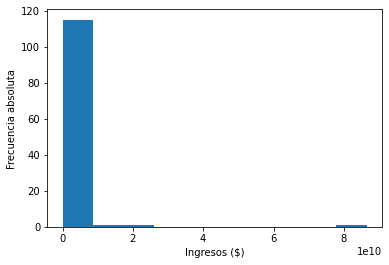

NormaltestResult(statistic=239.96907959190003, pvalue=7.787112570772441e-53)


In [13]:
plt.hist(ingresos_agrupados['INGRESOS_TOTAL_E'])
plt.xlabel('Ingresos ($)')
plt.ylabel('Frecuencia absoluta')
plt.show()
print(sts.normaltest(ingresos_agrupados['INGRESOS_TOTAL_E'])) # no pasa la prueba de normalidad (sesgo)

In [14]:
# cuántos ceros tenemos en las cifras
m = ingresos_agrupados[ingresos_agrupados['INGRESOS_TOTAL_E']!=0]

ingresos_agrupados_transformables = m

ingresos_agrupados_transformables

,GRUPO,INGRESOS_TOTAL_E
4,AMERICA MOVIL,86559324650.000000000
38,GRUPO TELEVISA,18204157323.790000916
6,AT&T,14680526078.000000000
101,TELEFONICA,6655353071.899999619
63,MEGACABLE-MCM,6433334578.200000763
...,...,...
53,JAIME SANCHEZ SANCHEZ,125171.000000000
37,GRUPO CORPORATIVO ZUNUN PAZ,88182.000000000
25,EDUARDO PEDRERO PEREZ,68200.000000000
48,IGOU TELECOM,61997.030000000


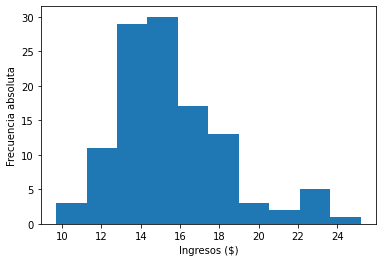

NormaltestResult(statistic=20.667330958740976, pvalue=3.251966809978271e-05)


In [15]:
# Aplicar logarítmos para reducir el efecto de la magnitud de los datos.
ln_ingresos = np.log(ingresos_agrupados_transformables['INGRESOS_TOTAL_E']) 

plt.hist(ln_ingresos)
plt.xlabel('Ingresos ($)')
plt.ylabel('Frecuencia absoluta')
plt.show()
print(sts.normaltest(ln_ingresos)) # no pasa la prueba de normalidad (sesgo)

In [16]:
# Análisis de varianza
var_numpy = np.var(ln_ingresos, ddof = 0)
print(f"La varianza del ln de los ingresos totales en 2021 es de {var_numpy}")
print(f'Lo que implica $ {np.exp(var_numpy)}')

sd_numpy = np.std(ln_ingresos,ddof = 0)
print(f"La desviación estándar del ln de los ingresos totales en 2021 es de {sd_numpy}")
print(f'Lo que implica $ {np.exp(sd_numpy)}')

La varianza del ln de los ingresos totales en 2021 es de 8.089757026085016
Lo que implica $ 3260.8951614995385
La desviación estándar del ln de los ingresos totales en 2021 es de 2.844249817805218
Lo que implica $ 17.18865920496856


In [17]:
var_numpy2 = np.var(ingresos_agrupados['INGRESOS_TOTAL_E'], ddof = 0)
print(f"La varianza del ln de los ingresos totales en 2021 es de {var_numpy2}")

sd_numpy2 = np.std(ingresos_agrupados['INGRESOS_TOTAL_E'],ddof = 0)
print(f"La desviación estándar del ln de los ingresos totales en 2021 es de {sd_numpy2}")


La varianza del ln de los ingresos totales en 2021 es de 6.772754472465604e+19
La desviación estándar del ln de los ingresos totales en 2021 es de 8229674642.697367


In [18]:
# La media
media = np.mean(ln_ingresos)
print(f"La media del ln de los ingresos 202 es de {media}")
print(f'Lo que implica $ {np.exp(media)}')

La media del ln de los ingresos 202 es de 15.551925110683992
Lo que implica $ 5676952.475370145


In [19]:
# Calculando la regla de 68-95-99.7 usando la desviación estándar:
print(f"Casi el 68% de los datos está entre {round(media-sd_numpy,3)} and {round(media+sd_numpy,3)}")
print(f"Casi el 95% de los datos está entre {round(media-2*sd_numpy,3)} and {round(media +2*sd_numpy,3)}")
print(f"Casi el 99.7% de los datos está entre {round(media-3*sd_numpy,3)} and {round(media+3*sd_numpy,3)}")

Casi el 68% de los datos está entre 12.708 and 18.396
Casi el 95% de los datos está entre 9.863 and 21.24
Casi el 99.7% de los datos está entre 7.019 and 24.085


In [20]:
# El score z nos dice el número de desviaciones estándar en el que un dato de ingreso está cerca de la media
z_scipy = sts.zscore(ln_ingresos)
print(f"Los score z es {z_scipy}")

Los score z es [ 3.38654174  2.83835501  2.76271885  2.4845786   2.47264979  2.45924285
  1.88551411  1.76630546  1.52605688  1.37336494  1.25172829  1.16810821
  1.15242846  1.115703    1.10759404  0.98800399  0.97206862  0.96617208
  0.92582449  0.91399133  0.88948858  0.86110258  0.75585214  0.73022418
  0.62129924  0.60631742  0.58670493  0.47978678  0.47255677  0.46848636
  0.42105476  0.33915417  0.32654099  0.3184484   0.3184484   0.30903062
  0.26757697  0.22966976  0.20782113  0.16815543  0.1217837   0.10923857
  0.07374804  0.03910471  0.03395439  0.01592497 -0.00876249 -0.01363698
 -0.01504733 -0.02038301 -0.05453571 -0.09124271 -0.11476189 -0.13207756
 -0.14005073 -0.14712846 -0.18663687 -0.19384552 -0.2013154  -0.2064363
 -0.23917642 -0.24113072 -0.26098485 -0.27677245 -0.29363899 -0.32561024
 -0.36459242 -0.36836634 -0.37608931 -0.3804018  -0.41843045 -0.43587238
 -0.4602558  -0.46329154 -0.47730916 -0.49104055 -0.52448029 -0.53066453
 -0.54496111 -0.55250764 -0.5615096  

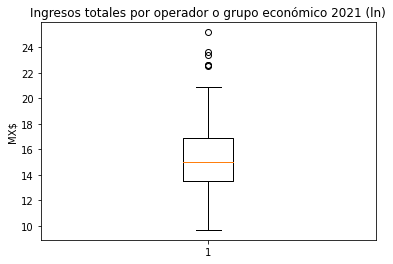

In [21]:
# Prueba de outliers (los grandes operadores)

fig1, ax1 = plt.subplots()
ax1.set_title('Ingresos totales por operador o grupo económico 2021 (ln)')
ax1.set_ylabel('MX$')
ax1.boxplot(ln_ingresos)
plt.show()

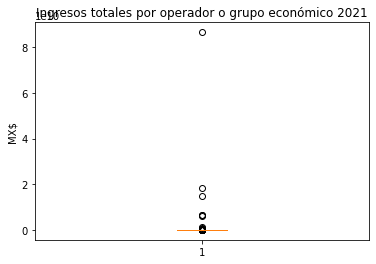

In [22]:
# Prueba de outliers (los grandes operadores)

fig1, ax1 = plt.subplots()
ax1.set_title('Ingresos totales por operador o grupo económico 2021')
ax1.set_ylabel('MX$')
ax1.boxplot(ingresos_agrupados['INGRESOS_TOTAL_E'])
plt.show()

In [36]:
# Análisis con quartiles y rango intercuantil para efectos de identificar los outliers

quartiles = ln_ingresos.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"El cuartil más bajo de los ingresos es: {lowerq}")
print(f"El cuartil más alto de los ingresos es: {upperq}")
print(f"El rango intercuantil de los ingresos es: {iqr}")
print(f"El ingreso medio es: {quartiles[0.5]} ")

lower_bound = lowerq - (1*iqr) # Basados en una distribución gaussiana, el 95.44% de los datos se encuentran dentro de las dos desviaciones estándar  
upper_bound = upperq + (1*iqr)
print(f"Valores por debajo {lower_bound} se consideran datos aberrantes.")
print(f"Valores por encima {upper_bound} se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.")



El cuartil más bajo de los ingresos es: 13.51531587998225
El cuartil más alto de los ingresos es: 16.89310031412893
El rango intercuantil de los ingresos es: 3.3777844341466796
El ingreso medio es: 15.010831615680564 
Valores por debajo 10.13753144583557 se consideran datos aberrantes.
Valores por encima 20.27088474827561 se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.


In [37]:
print(f'Los ingresos extremadamente grandes son aquellos que son mayores o iguales a $ {np.exp(upper_bound)}')

Los ingresos extremadamente grandes son aquellos que son mayores o iguales a $ 636111708.5629226


In [52]:
# de la lista de operadores que tienen un ingreso menor al upper bound son:
pd.set_option('display.max_rows', None)
# Los que quedan dentro del CPO
grupos_seleccionados = ingresos_agrupados_transformables[ingresos_agrupados_transformables['INGRESOS_TOTAL_E']<=636111708.5629226].sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)
grupos_seleccionados

,GRUPO,INGRESOS_TOTAL_E
87,STARGROUP,435677179.049999952
39,GTAC REDES DE FIBRA OPTICA,282197600.000000000
58,MARCATEL,199665310.550000012
61,MAXCOM,157402483.000000000
71,OUI,150537012.189999998
46,HNS DE MEXICO,135605863.389999986
28,EUTELSAT AMERICAS,132514054.019999996
113,VERIZON SERVICIOS EMPRESARIALES MEXICO,94305990.109999999
116,WIMOTELECOM,90127067.799999997
7,AXESAT,88628131.000000000


In [86]:
no_cumplen_criterio = ingresos_agrupados_transformables[ingresos_agrupados_transformables['INGRESOS_TOTAL_E']>636111708.5629226].sort_values(by=['INGRESOS_TOTAL_E'], ascending=False)
no_cumplen_criterio

,GRUPO,INGRESOS_TOTAL_E
4,AMERICA MOVIL,86559324650.000000000
38,GRUPO TELEVISA,18204157323.790000916
6,AT&T,14680526078.000000000
101,TELEFONICA,6655353071.899999619
63,MEGACABLE-MCM,6433334578.200000763
105,TOTALPLAY,6192632691.090000153
24,DISH-MVS,1211104115.000000000
3,ALTAN,862839373.789999962


In [47]:
# La diferencia de ingresos entre el último lugar del grupo rechazado y el primero en el grupo de pequeños operadores 
print(f'Diferencia en el ingreso del primer lugar en los CPO y el último lugar de los grandes operadores es: ${862839373.789999962-435677179.049999952}')

Diferencia en el ingreso del primer lugar en los CPO y el último lugar de los grandes operadores es: $427162194.74


In [104]:
# ¿Qué compañías son las que cumplen criterio?

nombre_grupos = grupos_seleccionados['GRUPO']
nombre_grupos

cumplen_criterio = ingresos_por_grupo[ingresos_por_grupo['GRUPO'].isin(nombre_grupos)].sort_values(by='INGRESOS_TOTAL_E', ascending=False, na_position='first')

cumplen_criterio.to_excel('cumplen_criterio2.xlsx')

cumplen_criterio.count()



CONCESIONARIO       108
GRUPO               108
INGRESOS_TOTAL_E    108
dtype: int64

In [105]:
# ¿Qué compañías son las que NO cumplen criterio?

nombre_grupos_no = no_cumplen_criterio['GRUPO']
nombre_grupos_no

cumplen_criterio_no = ingresos_por_grupo[ingresos_por_grupo['GRUPO'].isin(nombre_grupos_no)].sort_values(by='INGRESOS_TOTAL_E', ascending=False, na_position='first')

cumplen_criterio_no.to_excel('no_cumplen_criterio2.xlsx')

cumplen_criterio_no.count()

CONCESIONARIO       21
GRUPO               21
INGRESOS_TOTAL_E    21
dtype: int64

In [89]:
#¿Qué porcentaje representan del total de ingresos?

print(f"Porcentaje del total de ingresos que representan los operadores que cumplen el criterio: {round(cumplen_criterio['INGRESOS_TOTAL_E'].sum()/ingresos_totales*100,2)}%")
print(f"Porcentaje del total de ingresos que representan los operadores que no cumplen con el criterio de selección: {round(no_cumplen_criterio['INGRESOS_TOTAL_E'].sum()/ingresos_totales*100,2)}%")


Porcentaje del total de ingresos que representan los operadores que cumplen el criterio: 1.81%
Porcentaje del total de ingresos que representan los operadores que no cumplen con el criterio de selección: 98.19%


In [126]:

#¿Qué porcentaje representan del total de operadores que reportaron sus ingresos?

print(f"Porcentaje de operadores que reportaron sus ingresos y que cumplen el criterio: {round(1+cumplen_criterio['CONCESIONARIO'].count()/ingresos['CONCESIONARIO'].count()*100)}%")
print(f"Porcentaje de operadores que reportaron sus ingresos y que no cumplen el criterio: {round(2+cumplen_criterio_no['CONCESIONARIO'].count()/ingresos['CONCESIONARIO'].count()*100)}%")


Porcentaje de operadores que reportaron sus ingresos y que cumplen el criterio: 82%
Porcentaje de operadores que reportaron sus ingresos y que no cumplen el criterio: 18%


In [123]:
82.2+17.79


99.99000000000001

In [127]:
ingresos['I_FIJO_MOVIL'].unique()

array(['Fijo', 'FIJO', 'Fijo y OMV', 'MÃ³vil', 'Satelital',
       'Fijo y MÃ³vil', 'OMV', 'Red Compartida'], dtype=object)